In [1]:
from astropy.io import fits
import numpy as np
from matplotlib import pyplot as plt
import aplpy
from astropy.wcs import WCS
import astropy.units as u
from astropy.coordinates import SkyCoord
import fil_finder
from fil_finder import FilFinder2D, Filament2D
from astropy.io import fits
import tqdm
import copy
import random
from matplotlib.colors import rgb2hex, Normalize
from matplotlib.colorbar import ColorbarBase
import pandas as pd
# import warnings # warningが気になる方はこちらも
# warnings.simplefilter('ignore')


In [2]:
# hdu = fits.open("/Users/naoj306/Desktop/DB/anonymous1715940496/1342202254/level2_5/extdPLW/hspireplw274_25pxmp_0421_p2748_1342190616_1342202090_1462391077877.fits")[1] # 普通は [0] です。
# w = WCS(hdu)
# print(w)
# print("Pixel scale (CDELT):", w.wcs.cdelt)
# print("Axis units (CUNIT):", w.wcs.cunit)
# fig = plt.figure(figsize=(8, 8))
# f = aplpy.FITSFigure(hdu, slices=[0], convention='wells', figure=fig)
# f.show_colorscale(cmap="Greys", aspect="equal")


In [3]:
# distance = 150 * u.pc
# BMAJ = 30.0 * u.arcsec
# fil = FilFinder2D(fits.PrimaryHDU(hdu.data, hdu.header), distance=distance, beamwidth=BMAJ)
# fil.preprocess_image()
# plt.figure(figsize=(8, 8))
# fil.create_mask(verbose=True)

In [4]:
# hdu = fits.open("/Users/naoj306/Desktop/find/slice_new_wcs_diff_1-99_fil_3-3/12CO_x318_slice_diff_updated.fits")[0]  # 普通は [0] です。
# w = WCS(hdu)
# print(w)
# print("Pixel scale (CDELT):", w.wcs.cdelt)
# print("Axis units (CUNIT):", w.wcs.cunit)
# fig = plt.figure(figsize=(8, 8))
# f = aplpy.FITSFigure(hdu, slices=[0], convention='wells', figure=fig)
# f.show_colorscale(cmap="Greys", aspect="equal")


WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 0.0  0.0  
CRPIX : 590.0  111.0  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.000277778  0.000277778  
NAXIS : 0  0
Pixel scale (CDELT): [-0.00027778  0.00027778]
Axis units (CUNIT): ['deg', 'deg']
INFO: Auto-setting vmin to -1.571e+01 [aplpy.core]
INFO: Auto-setting vmax to  9.312e+01 [aplpy.core]


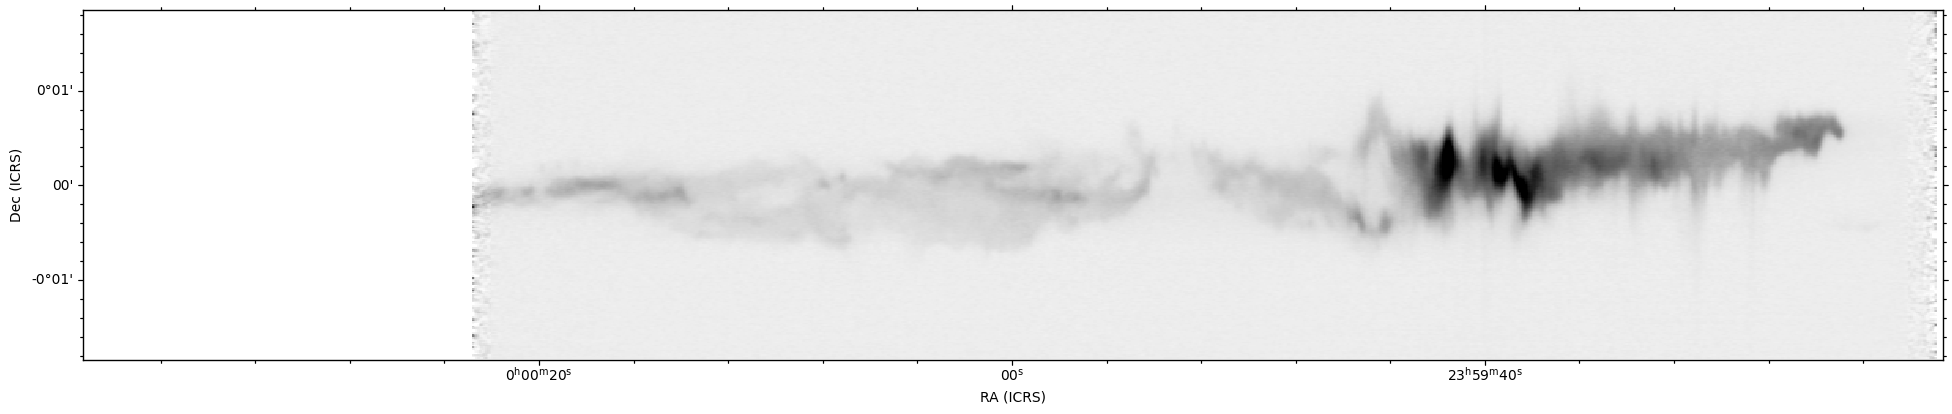

In [5]:
from astropy.io import fits
from astropy.wcs import WCS

# 打开原始的 FITS 文件
hdu = fits.open('/Users/naoj306/Desktop/find/orion_12/slice/vy/no_wcs/12CO_x444.fits')[0]

# 创建一个 WCS 对象并设置基本参数
w = WCS(naxis=2)
w.wcs.crpix = [hdu.header['NAXIS1'] / 2, hdu.header['NAXIS2'] / 2]  # 像素坐标系中心
w.wcs.cdelt = np.array([-0.000277778, 0.000277778])  # 像素尺度，单位是度
w.wcs.crval = [0, 0]  # 参考点的坐标（经度和纬度），需根据你的数据来设置
w.wcs.ctype = ["RA---TAN", "DEC--TAN"]  # 坐标类型

# 更新 FITS 头部信息
hdu.header.update(w.to_header())

# 保存新的 FITS 文件
hdu.writeto('new_fits_file.fits', overwrite=True)

print(w)
print("Pixel scale (CDELT):", w.wcs.cdelt)
print("Axis units (CUNIT):", w.wcs.cunit)

fig = plt.figure(figsize=(24, 5))
f = aplpy.FITSFigure(hdu, slices=[0], convention='wells', figure=fig)
f.show_colorscale(cmap="Greys", aspect="equal")


1. skip_flatten
用途：跳过图像的平坦化步骤。平坦化通常用于减少背景的渐变和非均匀性，有助于突出纤维。
调整：如果您发现纤维识别不全面，考虑关闭skip_flatten或调整flatten_percent参数（如果提供的话），以更好地处理背景。
2. adapt_thresh
用途：自适应阈值大小，用于局部区域以识别纤维。较大的值可能会忽略较小的或较微弱的结构。
调整：如果您发现某些纤维未被识别，可以尝试减小这个值，允许更多的小特征通过阈值测试。
3. smooth_size
用途：平滑操作的核大小，用于减少图像噪声对结果的影响。
调整：增大此值可以帮助平滑图像，减少噪声，但过大可能会导致纤维细节丢失。根据噪声水平调整。
4. size_thresh
用途：用于过滤掉面积小于此阈值的结构。
调整：如果太多小特征被错误识别为纤维，可以增大此值；如果有纤维被遗漏，可以适当减小此值。
5. glob_thresh
用途：全局阈值，用于整个图像的初始掩模生成。
调整：增大此值可以提高掩模生成的严格性，可能会遗漏微弱纤维；减小此值可能会包括更多背景噪声。
6. fill_hole_size
用途：在生成的掩模中填充小洞的大小限制。
调整：增大此值可以在纤维内部填充更大的空洞，有助于创建更连续的纤维结构；减小此值会减少填充，可能使掩模更贴近原始数据。

In [6]:
# from astropy import units as u
# from fil_finder import FilFinder2D
# import matplotlib.pyplot as plt
# 
# # 创建 FilFinder2D 实例
# fil = FilFinder2D(image=hdu.data)
# # 图像预处理，不跳过平坦化
# fil.preprocess_image(skip_flatten=True, flatten_percent=0)  # 尝试较高的平坦化百分比
# 
# # 创建掩模
# fil.create_mask(
#     verbose=True,
#     adapt_thresh=3 * u.pix,  # 减小自适应阈值
#     smooth_size=1 * u.pix,   # 增大平滑核尺寸
#     size_thresh=3 * u.pix * u.pix,  # 减小面积阈值
#     glob_thresh=0.5,         # 减小全局阈值
#     fill_hole_size=1 * u.pix * u.pix  # 增大洞填充大小
# )
# 
# # 可视化结果
# plt.figure()
# plt.imshow(fil.mask, cmap='gray', origin='lower')
# plt.colorbar()
# plt.title('FilFinder Mask')
# plt.show()


/opt/miniconda3/envs/py37/lib/python3.7/site-packages/fil_finder/filfinder2D.py:142: UserWarning: No beam width given. Using 0 pixels.
  warnings.warn("No beam width given. Using 0 pixels.")


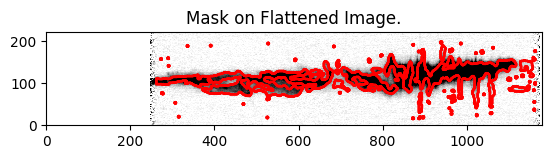

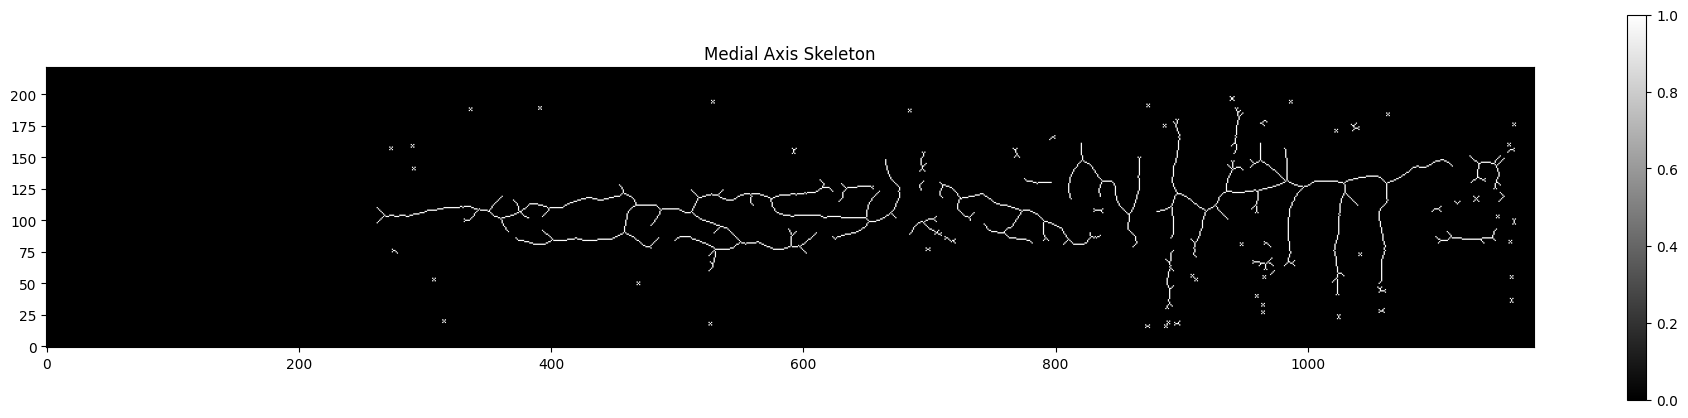

/opt/miniconda3/envs/py37/lib/python3.7/site-packages/fil_finder/filament.py:326: UserWarning: Graph pruning reached max iterations.
  warnings.warn("Graph pruning reached max iterations.")
/opt/miniconda3/envs/py37/lib/python3.7/site-packages/fil_finder/length.py:204: RuntimeWarning: Mean of empty slice
  av_intensity.append(np.nanmean(intensities))


Skeleton analyzed successfully.


In [7]:
from skimage.morphology import medial_axis
import matplotlib.pyplot as plt
from astropy import units as u
from fil_finder import FilFinder2D
from astropy.io import fits

# 假设 hdu.data 是您的图像数据
# 创建 FilFinder2D 实例，假设您已经有了 hdu 对象
fil = FilFinder2D(image=hdu.data)
# 图像预处理
fil.preprocess_image(skip_flatten=True)

# 创建掩模
mask_created = fil.create_mask(
    verbose=True,
    adapt_thresh=2 * u.pix,  # 自适应阈值
    smooth_size=1 * u.pix,   # 平滑核尺寸
    size_thresh=3 * u.pix**2,  # 面积阈值
    glob_thresh=0.6,         # 全局阈值
    fill_hole_size=1 * u.pix**2  # 填充洞的大小
)

# 生成骨架
fil.skeleton, distance = medial_axis(fil.mask, return_distance=True)

# 可视化生成的骨架
plt.figure(figsize=(24,5))
plt.imshow(fil.skeleton, cmap='gray', origin='lower')
plt.title('Medial Axis Skeleton')
plt.colorbar()
plt.show()

# 如果需要进一步分析
try:
    fil.analyze_skeletons(branch_thresh=5*u.pix, prune_criteria='length', skel_thresh=1*u.pix)
    print("Skeleton analyzed successfully.")
except Exception as e:
    print(f"Error analyzing skeleton: {e}")


In [8]:
# import numpy as np
# from scipy.spatial import distance
# import matplotlib.pyplot as plt
# 
# # 假设 fil.skeleton 已经创建
# if hasattr(fil, 'skeleton'):
#     plt.figure(figsize=(10, 10))
#     plt.imshow(fil.skeleton, cmap='gray', origin='lower')
#     plt.title('Skeleton without Filtering')
#     plt.colorbar()
#     plt.show()
# else:
#     print("Skeleton attribute not found or not created.")
#     
# # # 打印第一个纤维对象的所有属性
# # if fil.filaments:
# #     filament = fil.filaments[0]
# #     print("Attributes of a filament:")
# #     for attr in dir(filament):
# #         if not attr.startswith('__') and not callable(getattr(filament, attr)):
# #             print(f"{attr} : {getattr(filament, attr)}")
# #     
# kept_filaments = []
# angle_threshold = 20  # 度
# 
# for filament in fil.filaments:
#     if hasattr(filament, '_pixel_coords'):  # 确保属性存在
#         coords = filament._pixel_coords
#         # 取得首尾坐标
#         start = (coords[0][0], coords[1][0])  # (x_start, y_start)
#         end = (coords[0][-1], coords[1][-1])  # (x_end, y_end)
#         delta_x = end[0] - start[0]
#         delta_y = end[1] - start[1]
#         orientation = np.arctan2(delta_y, delta_x) * (180 / np.pi)  # 计算角度
#         vertical_angle = min(abs(orientation - 90), abs(orientation - 270))
#         
#         if vertical_angle < angle_threshold:
#             kept_filaments.append(filament)
# 
# # 可视化过滤后的纤维
# plt.figure(figsize=(10, 10))
# plt.imshow(fil.image, cmap='gray', origin='lower')
# for filament in kept_filaments:
#     x, y = filament._pixel_coords  # 获取纤维坐标，确保 x 是水平方向，y 是垂直方向
#     plt.plot(x, y, 'r-')
# plt.title('Filtered Vertical Filaments')
# plt.show()

In [9]:
from astropy.wcs import WCS
import fil_finder
from fil_finder import FilFinder2D, Filament2D

hdu = fits.open("/Users/naoj306/Desktop/find/py37_filfinder/new_fits_file.fits")[0] # 普通は [0] です。
w = WCS(hdu)

min_length = 7 * u.pix # この長さを超えていなければフィラメントとして認めない
max_dist = 100 * u.pix # フィラメントの幅を見積もるために強度をサーチしに行く最大距離

ori_branches_array = []
total_intensity_branches_array = []
length_branches_array = []
width_branches_array = []
width_err_branches_array = []
pos_x_branches_array, pos_y_branches_array = [], []
for fil_tempo in tqdm.tqdm(fil.filaments):
    y_start, x_start = fil_tempo.pixel_extents[0][0], fil_tempo.pixel_extents[0][1]
    fil_tempo.rht_branch_analysis()
    ori_branches_tempo = np.rad2deg(fil_tempo.orientation_branches.value)
    for i in range(len(fil_tempo.branch_pts())):
        pixels_tempo = fil_tempo.branch_properties["pixels"][i]
        y_pix_all = pixels_tempo[:,0]
        x_pix_all = pixels_tempo[:,1]
        pos_x_tempo = int(np.nanmax(x_pix_all)/2-np.nanmin(x_pix_all)/2)+np.nanmin(x_pix_all)+x_start
        pos_y_tempo = int(np.nanmax(y_pix_all)/2-np.nanmin(y_pix_all)/2)+np.nanmin(y_pix_all)+y_start
        ori_branch_tempo = ori_branches_tempo[i]
        pos_x_wcs_tempo, pos_y_wcs_tempo = w.wcs_pix2world(pos_x_tempo, pos_y_tempo, 0)
        pos_x_branches_array.append(pos_x_tempo)
        pos_y_branches_array.append(pos_y_tempo)
        if fil_tempo.branch_properties["length"][i]>min_length:
            ori_branches_array.append(ori_branch_tempo)
            branch_tempo_coords = (y_pix_all+y_start, x_pix_all+x_start)
            branch_tempo = Filament2D(branch_tempo_coords)
            branch_tempo.skeleton_analysis(hdu.data)
            branch_tempo.width_analysis(hdu.data, deconvolve_width=False, max_dist=max_dist)
            width_tempo, width_err_tempo = branch_tempo.radprof_fwhm()
            total_intensity_branches_array.append(branch_tempo.total_intensity())
            length_branches_array.append(fil_tempo.branch_properties["length"][i].value)
            width_branches_array.append(width_tempo.value)
            width_err_branches_array.append(width_err_tempo.value)
        else:
            ori_branches_array.append(np.nan)
            total_intensity_branches_array.append(np.nan)
            length_branches_array.append(np.nan)
            width_branches_array.append(np.nan)
            width_err_branches_array.append(np.nan)
ori_branches_array = np.array(ori_branches_array)
total_intensity_branches_array = np.array(total_intensity_branches_array)
length_branches_array = np.array(length_branches_array)
width_branches_array = np.array(width_branches_array)
width_err_branches_array = np.array(width_err_branches_array)
pos_x_branches_array = np.array(pos_x_branches_array)
pos_y_branches_array = np.array(pos_y_branches_array)


 49%|████▉     | 33/67 [00:16<00:15,  2.18it/s]/opt/miniconda3/envs/py37/lib/python3.7/site-packages/fil_finder/length.py:282: RuntimeWarning: invalid value encountered in float_scalars
  w * (intensity[idx] / np.sum(intensity))
100%|██████████| 67/67 [00:19<00:00,  3.43it/s]


Text(0, 0.5, 'Number of filaments')

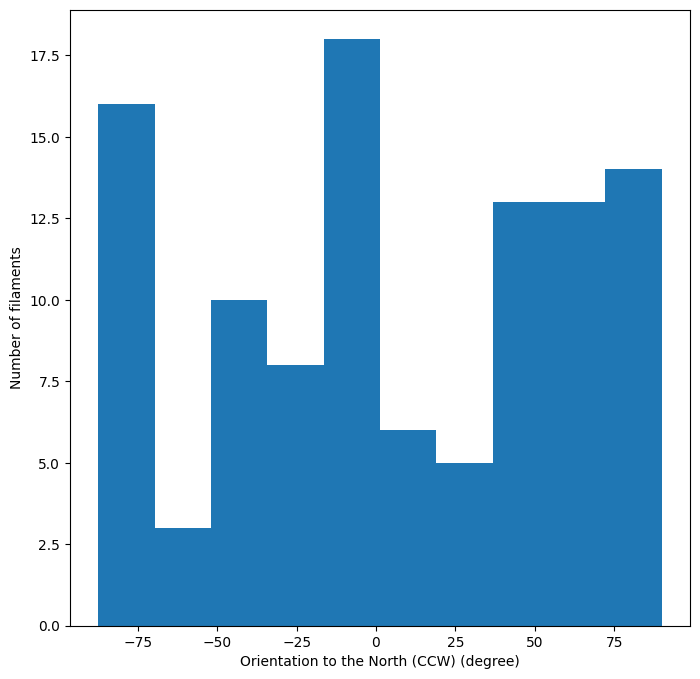

In [10]:
fig = plt.figure(figsize=(8, 8))
plt.hist(ori_branches_array)
plt.xlabel("Orientation to the North (CCW) (degree)")
plt.ylabel("Number of filaments")

In [11]:
# vmin1, vmax1 = 1, 100
# vmin2, vmax2 = -90, 90
# plt.rcParams["font.family"] = "Serif"
# 
# fig = plt.figure(figsize=(16, 16))
# f = aplpy.FITSFigure(hdu, slices=[0], figure=fig, subplot=[0.1, 0.1, 0.8, 0.8])
# f.show_colorscale(vmin = vmin1, vmax = vmax1, stretch="log", cmap="Greys")
# f.add_colorbar()
# f.colorbar.show()
# f.colorbar.set_width(0.2)
# f.colorbar.set_font(size=15)
# f.colorbar.set_axis_label_text("MJy/str")
# f.colorbar.set_axis_label_font(size=15)
# 
# pos_x_wcs_list = []
# pos_y_wcs_list = []
# color_tempo_list = []
# cmap = plt.get_cmap("jet")
# for fil_tempo in tqdm.tqdm(fil.filaments):
#     y_start, x_start = fil_tempo.pixel_extents[0][0], fil_tempo.pixel_extents[0][1]
#     fil_tempo.rht_branch_analysis()
#     ori_branches_tempo = np.rad2deg(fil_tempo.orientation_branches.value)
#     for i in range(len(fil_tempo.branch_pts())):
#         if fil_tempo.branch_properties["length"][i]>min_length:
#             pixels_tempo = fil_tempo.branch_properties["pixels"][i]
#             y_pix_all = pixels_tempo[:,0]
#             x_pix_all = pixels_tempo[:,1]
#             pos_x_tempo = int(np.nanmax(x_pix_all)/2-np.nanmin(x_pix_all)/2)+np.nanmin(x_pix_all)+x_start
#             pos_y_tempo = int(np.nanmax(y_pix_all)/2-np.nanmin(y_pix_all)/2)+np.nanmin(y_pix_all)+y_start
#             ori_branch_tempo = ori_branches_tempo[i]
#             pos_x_wcs_tempo, pos_y_wcs_tempo = w.wcs_pix2world(pos_x_tempo, pos_y_tempo, 0)
#             branch_tempo_coords = (y_pix_all+y_start, x_pix_all+x_start)
#             branch_tempo = Filament2D(branch_tempo_coords)
#             branch_tempo.skeleton_analysis(hdu.data)
#             branch_tempo.width_analysis(hdu.data, deconvolve_width=False)
#             pos_x_wcs_array, pos_y_wcs_array = w.wcs_pix2world(x_pix_all+x_start, y_pix_all+y_start, 0)
#             pos_x_wcs_list += list(pos_x_wcs_array)
#             pos_y_wcs_list += list(pos_y_wcs_array)
#             color_tempo = rgb2hex(cmap(Normalize(vmin=vmin2, vmax=vmax2)(ori_branch_tempo)))
#             color_tempo_list += [color_tempo]*len(pos_x_wcs_array)
#             
#             
# f.show_markers(pos_x_wcs_list, pos_y_wcs_list, marker="s", s=5, facecolor=color_tempo_list, edgecolor="none", zorder=11)
# 
# ax = fig.add_subplot(1, 1, 1)
# norm = Normalize(vmin=vmin2, vmax=vmax2)
# cb = ColorbarBase(ax=ax, cmap="jet", orientation="horizontal", norm=norm)
# cb.ax.set_position([0.1, 0.92, 0.8, 0.02])
# cb.set_label("Orientation to the North (CCW) (degree)", labelpad=-70, size=15)
# 
# fig.patch.set_facecolor('w')
# #f.save('./neko.png', dpi=200)


INFO: Auto-setting vmin to -2.064e+01 [aplpy.core]
INFO: Auto-setting vmax to  3.625e+01 [aplpy.core]


  0%|          | 0/67 [00:00<?, ?it/s]/opt/miniconda3/envs/py37/lib/python3.7/site-packages/fil_finder/filament.py:326: UserWarning: Graph pruning reached max iterations.
  warnings.warn("Graph pruning reached max iterations.")
 22%|██▏       | 15/67 [00:02<00:08,  6.02it/s]/opt/miniconda3/envs/py37/lib/python3.7/site-packages/fil_finder/length.py:204: RuntimeWarning: Mean of empty slice
  av_intensity.append(np.nanmean(intensities))
 49%|████▉     | 33/67 [00:06<00:06,  5.26it/s]/opt/miniconda3/envs/py37/lib/python3.7/site-packages/fil_finder/length.py:282: RuntimeWarning: invalid value encountered in float_scalars
  w * (intensity[idx] / np.sum(intensity))
100%|██████████| 67/67 [00:07<00:00,  8.48it/s]


Number of selected filaments within -20 to 20 degrees: 27
Filament0: X range (889, 894), Y range (31, 77)
Filament0: X range (1021, 1029), Y range (43, 122)
Filament1: X range (1057, 1064), Y range (51, 129)
Filament2: X range (985, 996), Y range (67, 126)
Filament3: X range (910, 919), Y range (72, 107)
Filament4: X range (892, 894), Y range (87, 111)
Filament7: X range (959, 961), Y range (108, 123)
Filament13: X range (893, 899), Y range (123, 180)
Filament17: X range (936, 940), Y range (126, 140)
Filament23: X range (982, 984), Y range (134, 158)
Filament0: X range (526, 531), Y range (61, 77)
Filament9: X range (591, 592), Y range (82, 89)
Filament20: X range (654, 677), Y range (100, 149)
Filament39: X range (559, 561), Y range (113, 120)
Filament0: X range (858, 865), Y range (80, 105)
Filament2: X range (860, 868), Y range (107, 151)
Filament3: X range (811, 821), Y range (118, 148)
Filament4: X range (835, 837), Y range (120, 131)
Filament6: X range (821, 822), Y range (150, 

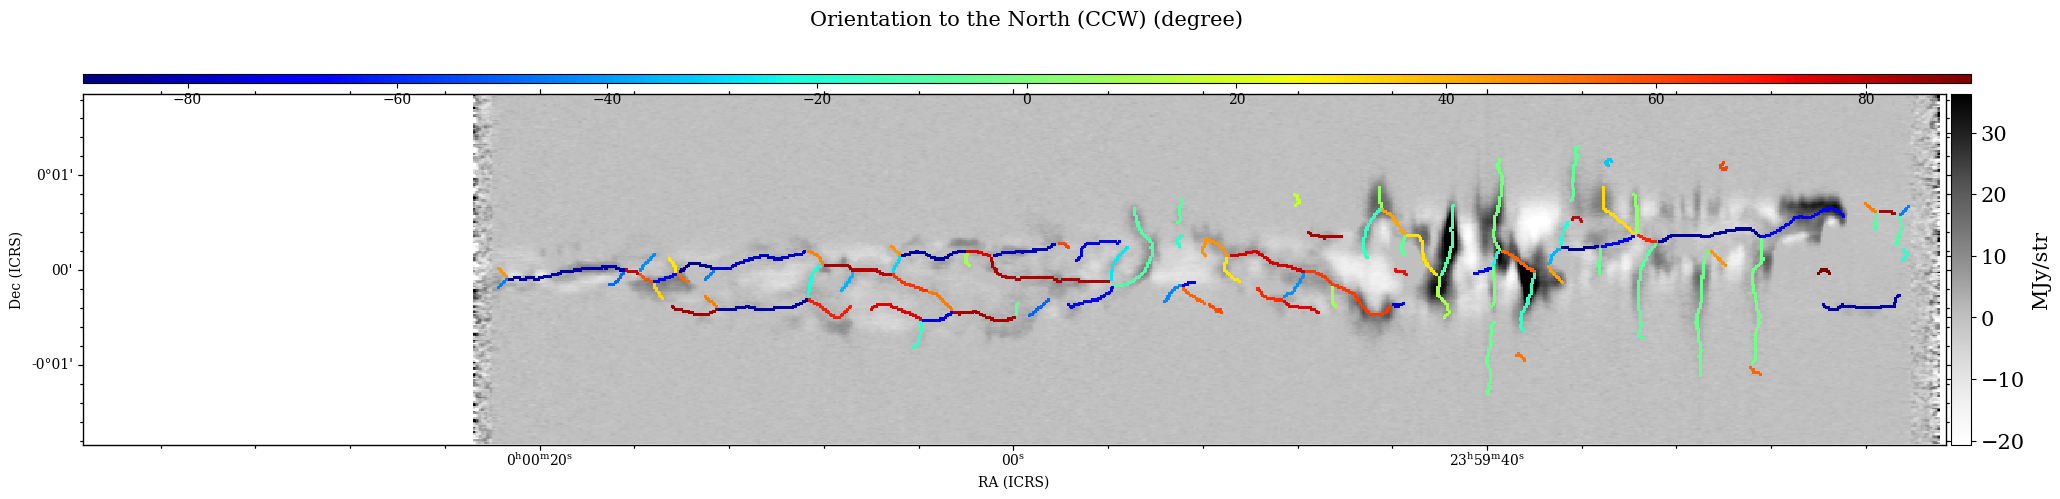

In [12]:
vmin1, vmax1 = 1, 100
vmin2, vmax2 = -90, 90
plt.rcParams["font.family"] = "Serif"

fig = plt.figure(figsize=(23.6, 4.44))
f = aplpy.FITSFigure(hdu, slices=[0], figure=fig, subplot=[0.1, 0.1, 0.8, 0.8])
# f.show_colorscale(vmin = vmin1, vmax = vmax1, stretch="log", cmap="Greys")
f.show_colorscale(cmap="Greys")
f.add_colorbar()
f.colorbar.show()
f.colorbar.set_width(0.2)
f.colorbar.set_font(size=15)
f.colorbar.set_axis_label_text("MJy/str")
f.colorbar.set_axis_label_font(size=15)

angle_range = 20
selected_filaments = []
pos_x_wcs_list = []
pos_y_wcs_list = []
color_tempo_list = []
cmap = plt.get_cmap("jet")
for fil_tempo in tqdm.tqdm(fil.filaments):
    y_start, x_start = fil_tempo.pixel_extents[0][0], fil_tempo.pixel_extents[0][1]
    fil_tempo.rht_branch_analysis()
    ori_branches_tempo = np.rad2deg(fil_tempo.orientation_branches.value)
    for i in range(len(fil_tempo.branch_pts())):
        if fil_tempo.branch_properties["length"][i]>min_length:
            pixels_tempo = fil_tempo.branch_properties["pixels"][i]
            y_pix_all = pixels_tempo[:,0]
            x_pix_all = pixels_tempo[:,1]
            pos_x_tempo = int(np.nanmax(x_pix_all)/2-np.nanmin(x_pix_all)/2)+np.nanmin(x_pix_all)+x_start
            pos_y_tempo = int(np.nanmax(y_pix_all)/2-np.nanmin(y_pix_all)/2)+np.nanmin(y_pix_all)+y_start
            ori_branch_tempo = ori_branches_tempo[i]
            pos_x_wcs_tempo, pos_y_wcs_tempo = w.wcs_pix2world(pos_x_tempo, pos_y_tempo, 0)
            branch_tempo_coords = (y_pix_all+y_start, x_pix_all+x_start)
            branch_tempo = Filament2D(branch_tempo_coords)
            branch_tempo.skeleton_analysis(hdu.data)
            branch_tempo.width_analysis(hdu.data, deconvolve_width=False)
            pos_x_wcs_array, pos_y_wcs_array = w.wcs_pix2world(x_pix_all+x_start, y_pix_all+y_start, 0)
            pos_x_wcs_list += list(pos_x_wcs_array)
            pos_y_wcs_list += list(pos_y_wcs_array)
            color_tempo = rgb2hex(cmap(Normalize(vmin=vmin2, vmax=vmax2)(ori_branch_tempo)))
            color_tempo_list += [color_tempo]*len(pos_x_wcs_array)
            
            if -angle_range <= ori_branch_tempo <= angle_range:
                pixels_tempo = fil_tempo.branch_properties["pixels"][i]
                y_pix_all = pixels_tempo[:,0]
                x_pix_all = pixels_tempo[:,1]
                x_min, x_max = x_start + np.min(x_pix_all), x_start + np.max(x_pix_all)
                y_min, y_max = y_start + np.min(y_pix_all), y_start + np.max(y_pix_all)
                # 存储选中的云丝分支信息
                selected_filaments.append(f"Filament{i}: X range ({x_min}, {x_max}), Y range ({y_min}, {y_max})")

   
f.show_markers(pos_x_wcs_list, pos_y_wcs_list, marker="s", s=5, facecolor=color_tempo_list, edgecolor="none", zorder=11)

print(f"Number of selected filaments within -{angle_range} to {angle_range} degrees: {len(selected_filaments)}")
for filament_info in selected_filaments:
    print(filament_info)
    
ax = fig.add_subplot(1, 1, 1)
norm = Normalize(vmin=vmin2, vmax=vmax2)
cb = ColorbarBase(ax=ax, cmap="jet", orientation="horizontal", norm=norm)
cb.ax.set_position([0.1, 0.92, 0.8, 0.02])
cb.set_label("Orientation to the North (CCW) (degree)", labelpad=-70, size=15)

fig.patch.set_facecolor('w')
#f.save('./neko.png', dpi=200)


INFO: Auto-setting vmin to -2.000e+01 [aplpy.core]
INFO: Auto-setting vmax to  3.776e+01 [aplpy.core]


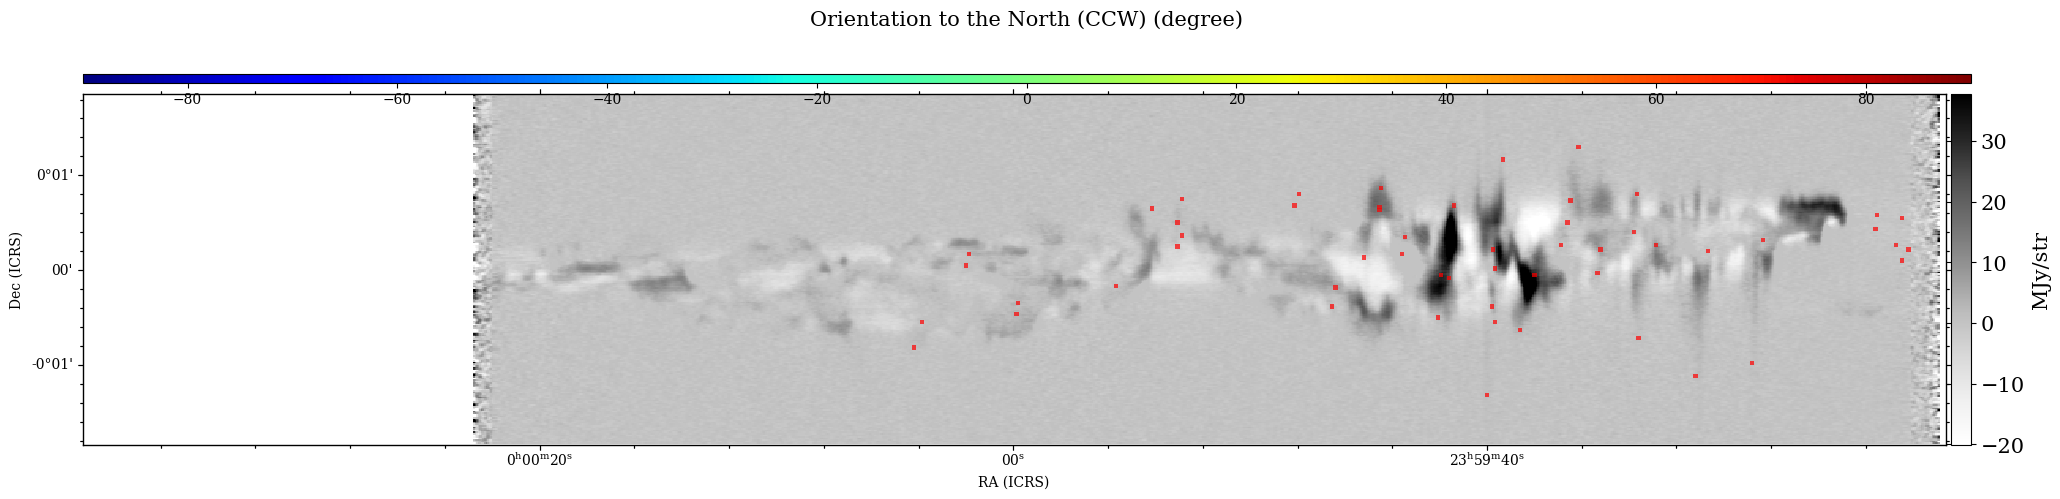

In [13]:
fig2 = plt.figure(figsize=(23.6, 4.44))
f2 = aplpy.FITSFigure(hdu, slices=[0], figure=fig2, subplot=[0.1, 0.1, 0.8, 0.8])
# f2.show_colorscale(vmin=vmin1, vmax=vmax1, stretch="log", cmap="Greys")
f2.show_colorscale(cmap="Greys")
f2.add_colorbar()
f2.colorbar.show()
f2.colorbar.set_width(0.2)
f2.colorbar.set_font(size=15)
f2.colorbar.set_axis_label_text("MJy/str")
f2.colorbar.set_axis_label_font(size=15)

pos_x_wcs_selected = []
pos_y_wcs_selected = []
color_selected = []

for filament in selected_filaments:
    # Extracting the x and y ranges directly by parsing the string correctly
    x_range = filament.split('X range ')[1].split(', Y range')[0].strip('()').split(', ')
    y_range = filament.split('Y range ')[1].strip('()').split(', ')
    x_min, x_max = map(int, x_range)
    y_min, y_max = map(int, y_range)

    # Convert pixel coordinates to WCS
    pos_x_wcs, pos_y_wcs = w.wcs_pix2world([x_min, x_max], [y_min, y_max], 0)
    pos_x_wcs_selected.extend(pos_x_wcs)
    pos_y_wcs_selected.extend(pos_y_wcs)
    color_selected.extend(['red'] * 2)  # Assigning 'red' for both min and max points

# Displaying selected filaments
f2.show_markers(pos_x_wcs_selected, pos_y_wcs_selected, marker='s', s=10, facecolor=color_selected, edgecolor='none', alpha=0.7)

ax2 = fig2.add_subplot(1, 1, 1)
norm2 = Normalize(vmin=vmin2, vmax=vmax2)
cb2 = ColorbarBase(ax=ax2, cmap="jet", orientation="horizontal", norm=norm2)
cb2.ax.set_position([0.1, 0.92, 0.8, 0.02])
cb2.set_label("Orientation to the North (CCW) (degree)", labelpad=-70, size=15)

fig2.patch.set_facecolor('w')
# Optional: Display the figure or save it
# plt.show()
# f2.save('./selected_filaments.png', dpi=200)


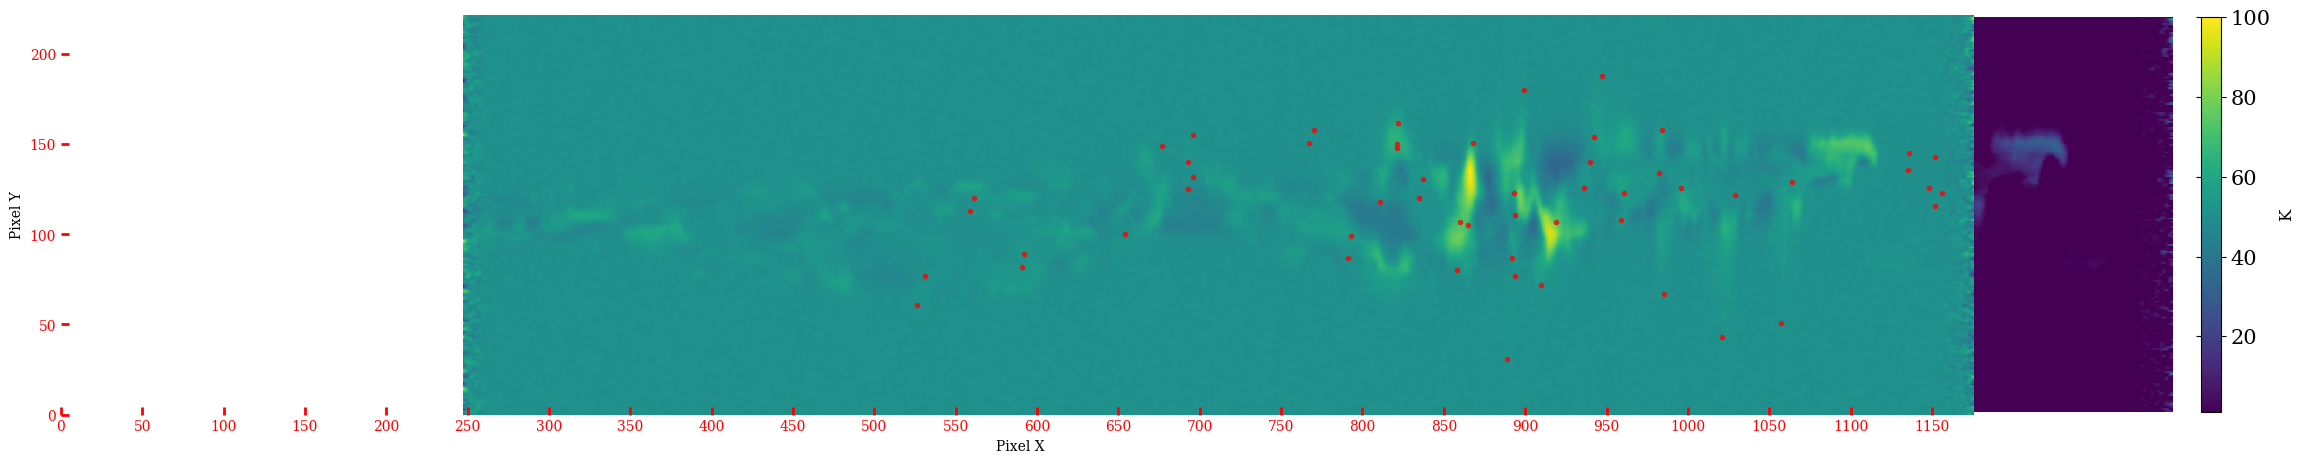

In [14]:
import matplotlib.pyplot as plt
import aplpy
from matplotlib.colors import Normalize
from matplotlib.colorbar import ColorbarBase

# 创建图形和子图
fig2 = plt.figure(figsize=(24, 5))
f2 = aplpy.FITSFigure(hdu, slices=[0], figure=fig2, subplot=[0.1, 0.1, 0.9, 0.8])
f2.show_colorscale(vmin=vmin1, vmax=vmax1)
f2.add_colorbar()
f2.colorbar.show()
f2.colorbar.set_width(0.2)
f2.colorbar.set_location('right')
f2.colorbar.set_font(size=15)
f2.colorbar.set_axis_label_text("K")
f2.colorbar.set_axis_label_font(size=12)

# 隐藏WCS坐标轴标签和刻度
f2.axis_labels.hide()
f2.tick_labels.hide()
f2.ticks.hide()
f2.frame.set_linewidth(0)

# 将FITS图像数据转换为像素坐标系下的标记点
pos_x_pixels = []
pos_y_pixels = []
for filament in selected_filaments:
    x_range = filament.split('X range ')[1].split(', Y range')[0].strip('()').split(', ')
    y_range = filament.split('Y range ')[1].strip('()').split(', ')
    x_min, x_max = map(int, x_range)
    y_min, y_max = map(int, y_range)
    pos_x_pixels.extend([x_min, x_max])
    pos_y_pixels.extend([y_min, y_max])

# 添加覆盖的坐标轴以显示像素坐标
ax2 = fig2.add_axes([0.1, 0.1, 0.8, 0.8], frameon=False)
ax2.imshow(hdu.data, origin='lower', aspect='auto')
ax2.set_xlim(0, hdu.data.shape[1])
ax2.set_ylim(0, hdu.data.shape[0])
ax2.set_xlabel('Pixel X')
ax2.set_ylabel('Pixel Y')
ax2.tick_params(direction='in', length=6, width=2, colors='r', grid_color='r', grid_alpha=0.5)
ax2.set_xticks(range(0, hdu.data.shape[1] + 1, 50))
ax2.set_yticks(range(0, hdu.data.shape[0] + 1, 50))

# 在同一坐标系上添加标记
ax2.plot(pos_x_pixels, pos_y_pixels, 'ro', markersize=3, alpha=0.7)  # 使用红色圆点表示标记

# 显示图形
plt.show()
